In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
#debido al tamaño de los csv, se realiza la especificación de tipos de datos para minimizar un poco el uso de la memoria
dtypesEvents = {'ref_type':'category', 'event_id' : 'category', 'ref_hash': 'category', 'application_id':'category',\
                     'attributed':bool, 'device_os':'category', 'device_os_version':'category', 'device_brand':'category',\
                     'device_model':'category','device_city':'category', 'session_user_agent':'category', 'trans_id':\
                     'category', 'user_agent':'category','carrier':'category','kind':'category',\
                     'wifi':'category','connection_type':'category','ip_address':'category','device_language':'category',\
                     'device_countrycode':'category'}

path = '/home/arnoldc/_workspaceOrgaDatos19/data/'

events = pd.read_csv(path + 'events.csv', encoding='latin-1', low_memory=False, dtype=dtypesEvents)
#clicks = pd.read_csv(path + 'clicks.csv', encoding='latin-1', low_memory=False)
#installs = pd.read_csv(path + 'installs.csv', encoding='latin-1', low_memory=False)
#auctions = pd.read_csv(path + 'auctions.csv', encoding='latin-1', low_memory=False)

In [43]:
#pasamos a dateTime la columna de 'date'
events['date'] = pd.to_datetime(events['date'])

In [44]:
#Verificamos tipos

events.dtypes

date                  datetime64[ns]
event_id                    category
ref_type                    category
ref_hash                    category
application_id              category
attributed                      bool
device_countrycode          category
device_os_version           category
device_brand                category
device_model                category
device_city                 category
session_user_agent          category
trans_id                    category
user_agent                  category
event_uuid                    object
carrier                     category
kind                        category
device_os                   category
wifi                        category
connection_type             category
ip_address                  category
device_language             category
dtype: object

In [46]:
events.describe(include='all')

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
count,2494423,2494423,2494423,2494423,2494423,2494423,2494423,1022066,1164963,2406456,...,82,1391527,2489324,616434,2489324,657667,1378872,612463,2494423,2406604
unique,2488829,568,2,196049,269,2,1,81,250,2624,...,13,5111,2489324,84,583,4,2,3,285212,186
top,2019-03-12 14:36:58.017000,22,1891515180541284343,7823950631004872496,66,False,6333597102633388268,4.3537503246500966e+18,3.083058605577787e+17,2.33194661091417e+18,...,{hash},2.394269162455642e+18,8d018ca7-2c4e-4761-9e6b-456c3ef6326c,2.2481569642543155e+17,5.500848327478996e+18,7.531669329342818e+18,true,Cable/DSL,1992632945768888579,6.977049253562486e+18
freq,3,618228,1882743,2913,325696,2489324,2494423,277691,579861,210697,...,33,42325,1,436983,618217,389811,930902,331948,22640,745898
first,2019-03-05 00:00:00.255000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-03-13 23:59:59.984000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Del 'describe' se observan:
    * los eventos ocurren en el intervalo de tiempo [05/03/2019, 13/03/2019]
    * los event_id se repiten bastante. Hay 568 distintos. Por lo que ese id no es un clave primaria sino que más bien corresponde a un tipo de evento
    * ref_type hay dos. Tiene sentido ya que hace referencia si el evento ocurrió en un SO android o apple
    * hay 269 aplicaciones distintas
    * la mayoría de attributed son Falsos
    * todos los eventos correspondes a un sólo país
    * trans_id tiene muy pocos valores y en casi todo el set de datos son valores null. Por lo que no sería un dato relevante
    * event_uuid no se repite. Por lo que sería éste candidato a ser clave primaria, en el sentido que cada event_uuid se corresponde con una unica row
    * kind tiene un valor de repitición muy parecido a event_id
    * 186 lenguajes de dispositivo distintos?
    * ip_address se repite moderadamente, por lo que hay alguna concentración de eventos en las ip

## Análisis 1
Cantidad de conections con wifi 

Text(0.5, 1.0, 'Wifi connections')

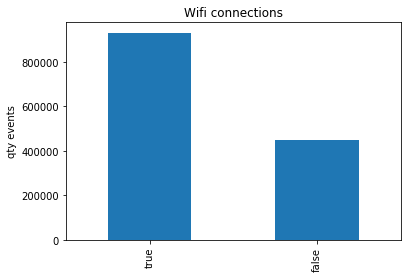

In [113]:
wifiGr = events['wifi'].value_counts().plot('bar')
wifiGr.set_ylabel('qty events')
wifiGr.set_title('Wifi connections')

## Análisis 2
Tipos de conections con sus cantidades

Text(0.5, 1.0, 'connection types')

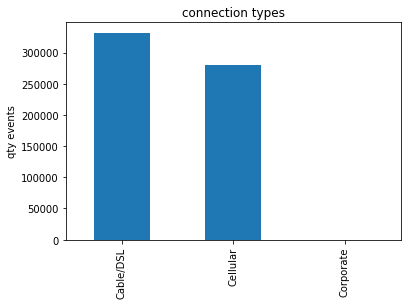

In [114]:
typeConnGr = events['connection_type'].value_counts()[:10].plot('bar')
typeConnGr.set_ylabel('qty events')
typeConnGr.set_title('connection types')

## Análisis 3
Top 10 segun event_id

Text(0.5, 1.0, 'top Events')

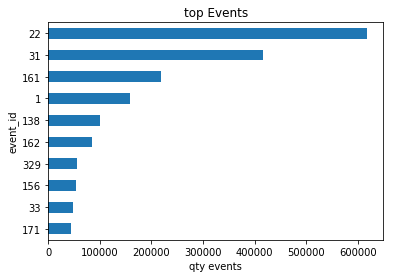

In [116]:
topEvents = events['event_id'].value_counts().head(10).sort_values()
topEventsGr = topEvents.plot('barh')
topEventsGr.set_xlabel('qty events')
topEventsGr.set_ylabel('event_id')
topEventsGr.set_title('top Events')

## Análisis 4
Top 10 de aplicaciones

Text(0.5, 1.0, 'top Apps')

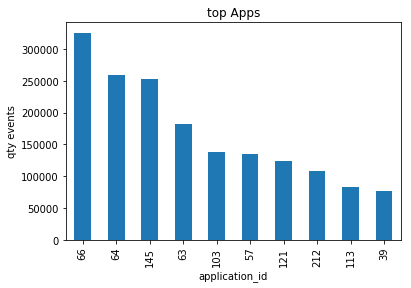

In [90]:
topApps = events['application_id'].value_counts().head(10)
topAppsGr = topApps.plot('bar')
topAppsGr.set_xlabel('application_id')
topAppsGr.set_ylabel('qty events')
topAppsGr.set_title('top Apps')

## Análisis 5
Comparación entre eventos originados de dispositivos google o apple

Text(0.5, 1.0, 'Comparison according to ref_type')

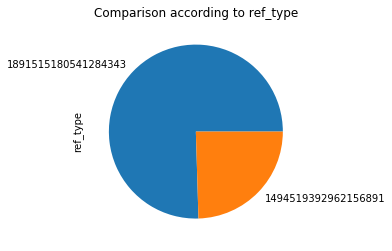

In [89]:
compareRefType = events['ref_type'].value_counts()
compareRefTypeGr = compareRefType.plot('pie')
compareRefTypeGr.set_title('Comparison according to ref_type')

## Análisis 6
Día de la semana con más cantidad de eventos

Text(0.5, 1.0, 'Day of the week with more events')

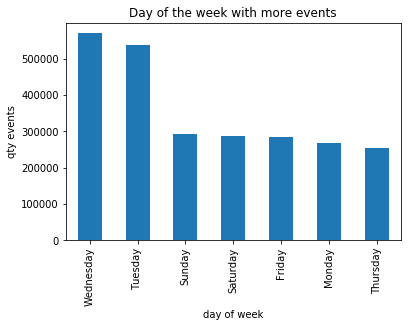

In [88]:
dateEvents = events['date']
daySeries = dateEvents.dt.day_name().value_counts()
dateEventsGr = daySeries.plot('bar')
dateEventsGr.set_xlabel('day of week')
dateEventsGr.set_ylabel('qty events')
dateEventsGr.set_title('Day of the week with more events')

## Análisis 7
Cantidad de eventos que le fueron atribuidos a Jampp

Text(0.5, 1.0, 'Events attributed to Jampp')

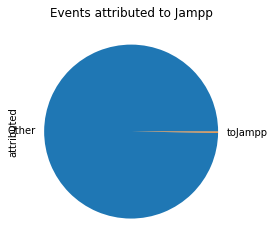

In [101]:
compareAttributed = events['attributed'].map(lambda x: "toJampp" if x else "Other").value_counts()
compareAttributedGr = compareAttributed.plot('pie')
compareAttributedGr.set_title('Events attributed to Jampp')

# Análisis 8
Cantidad de eventos por conexiones wifi

Text(0.5, 1.0, 'Cantidad de eventos por conexiones wifi')

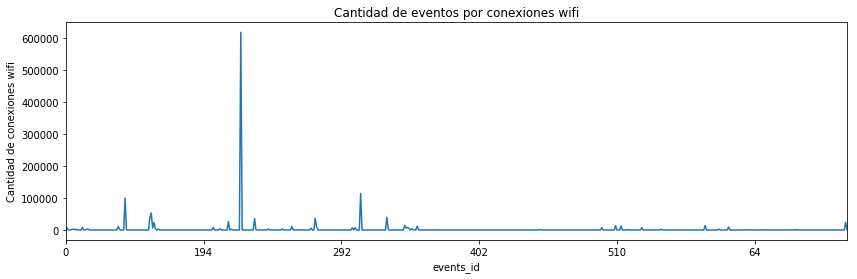

In [104]:
plt = events.groupby('event_id').count()['wifi'].plot(figsize=(14,4));
plt.set_xlabel('events_id')
plt.set_ylabel('Cantidad de conexiones wifi')
plt.set_title('Cantidad de eventos por conexiones wifi')